In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [ ]:
# 데이터셋 생성
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# DBSCAN 모델 정의
eps = 0.2  # 거리 임계값
min_samples = 5  # 군집 내 최소 샘플 수
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

outliers = (clusters == -1)


outliers_ratio = np.sum(outliers) / len(X)
unique_clusters = len(set(clusters) - {-1})

print(f"이상치 비율: {outliers_ratio * 100:.2f}%")
print(f"클러스터 개수 (이상치 제외): {unique_clusters}")
# 이상치 탐지: 클러스터 레이블이 -1인 데이터는 이상치로 간주
outliers = (clusters == -1)

이상치 비율: 0.00%
클러스터 개수 (이상치 제외): 2


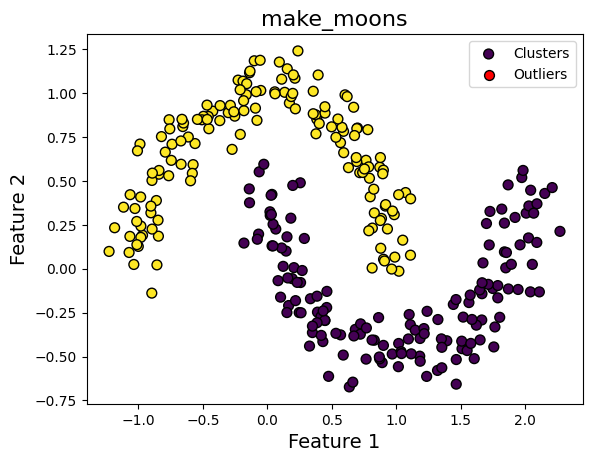

In [ ]:
#시각화
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k', label='Clusters')
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=50, edgecolor='k', label='Outliers')
plt.title('make_moos', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.legend()
plt.show()

DBSCAN (eps=2.5, min_samples=10) Clusters:
(array([-1,  0,  1]), array([ 32, 101,  45]))
Cluster vs Class (eps=2.5, min_samples=10):
Class   0   1   2
row_0            
-1      3  25   4
 0     56  45   0
 1      0   1  44


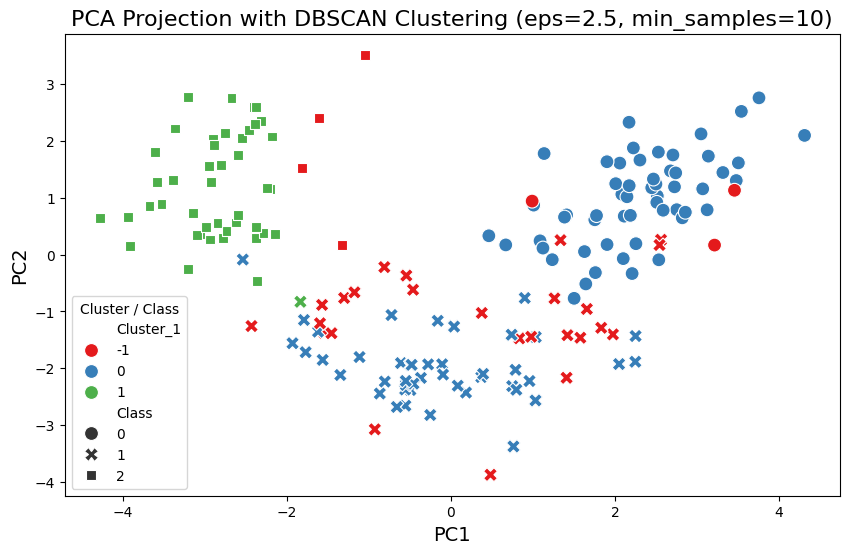

클러스터 개수 (이상치 제외): 2
이상치 개수: 32


In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

# 데이터셋 로드
wine = load_wine()
X = pd.DataFrame(wine.data, columns=[
    "Alcohol", "MalicAcid", "Ash", "Alk_ash", "Magnesium", "T_phenols", "Flavanoids",
    "Non_flav", "Proantho", "C_Intensity", "Hue", "OD280_315", "Proline"
])
y = pd.Series(wine.target, name="Class")


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


dbscan_1 = DBSCAN(eps=2.5, min_samples=10)



clusters_1 = dbscan_1.fit_predict(X_scaled)



print("DBSCAN (eps=2.5, min_samples=10) Clusters:")
print(np.unique(clusters_1, return_counts=True))


# 군집과 실제 클래스 비교
print("Cluster vs Class (eps=2.5, min_samples=10):")
print(pd.crosstab(clusters_1, y))



pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


project = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
project['Class'] = y
project['Cluster_1'] = clusters_1



plt.figure(figsize=(10, 6))

# DBSCAN 군집을 색상으로, 클래스는 모양으로 구분
sns.scatterplot(data=project, x="PC1", y="PC2", hue="Cluster_1", style="Class", palette="Set1", s=100)

plt.title("PCA Projection with DBSCAN Clustering (eps=2.5, min_samples=10)", fontsize=16)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.legend(title="Cluster / Class")
plt.show()


num_clusters = len(set(clusters_1)) - (1 if -1 in clusters_1 else 0)  # 이상치 (-1)을 제외한 클러스터 수
num_outliers = np.sum(clusters_1 == -1)  # 이상치의 개수

print(f"클러스터 개수 (이상치 제외): {num_clusters}")
print(f"이상치 개수: {num_outliers}")